In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from utils import sample

In [2]:
N = 32
M = 64
num_try = 10

In [3]:
def rhoUF(rho, U):
    rhos = []
    UF = []
    UFstd = []
    for i in range(20):
        idx = np.nonzero((i*0.05<=rho) & (rho<(i+1)*0.05))
        x_group = rho[idx]
        y_group = U[idx]
        if x_group.shape != (0,):
            rhos = np.append(rhos ,np.mean(x_group))
            UF = np.append(UF ,np.mean(y_group))
            UFstd = np.append(UFstd ,np.std(y_group)/np.sqrt(x_group.shape[0]))
            UFall = np.concatenate((UF.reshape(1,-1), UFstd.reshape(1,-1)),axis=0)
    return rhos, UFall

In [4]:
sigY_span = np.linspace(0,1,200)
NU = np.zeros((len(sigY_span), num_try))
rho = np.zeros((len(sigY_span), num_try))
for i in range(len(sigY_span)):
    sigY = sigY_span[i]
    for j in range(num_try):
        NU[i,j], rho[i,j] = sample(N,M,0,sigY,0)
U = (NU > 0).astype(float)
rhosY, UFY = rhoUF(rho, U)

In [5]:
sigY = 0.1
sigH_span = np.linspace(0,1,200)
NU = np.zeros((len(sigH_span), num_try))
rho = np.zeros((len(sigH_span), num_try))
for i in range(len(sigH_span)):
    sigH = sigH_span[i]
    for j in range(num_try):
        NU[i,j], rho[i,j] = sample(N,M,0,sigY,sigH)
U = (NU > 0).astype(float)
rhosH, UFH = rhoUF(rho, U)

In [6]:
sigY = 0.1
sigP_span = np.linspace(0,.4,200)
rho = np.zeros((len(sigP_span), num_try))
NU = np.zeros((len(sigP_span), num_try))
for i in range(len(sigP_span)):
    sigP = sigP_span[i]
    for j in range(num_try):
        NU[i,j], rho[i,j] = sample(N,M,sigP,sigY,0)
U = (NU > 0).astype(float)
rhosP, UFP = rhoUF(rho, U)

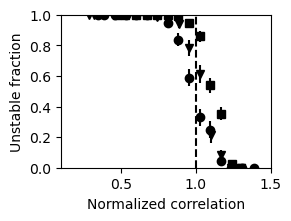

In [7]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
#plt.plot(rhosY, UFY,'ok',rhosH, UFH,'vk', rhosP, UFP,'sk')
plt.errorbar(rhosY * np.sqrt(2), UFY[0], UFY[1], ls='none', marker = 'o', c='k')
plt.errorbar(rhosH * np.sqrt(2), UFH[0], UFH[1], ls='none', marker = 'v', c='k')
plt.errorbar(rhosP * np.sqrt(2), UFP[0], UFP[1], ls='none', marker = 's', c='k')
plt.plot(np.linspace(1,1,10),np.linspace(0,1,10),'k--')
plt.xlim(0.1,1.5)
plt.xticks([0.5,1.0,1.5])
plt.ylim(0.,1.0)
plt.xlabel('Normalized correlation')
plt.ylabel('Unstable fraction')
plt.savefig('../figures/test18.eps')